## 가설 설정과 검증
### 가설
#### > 음주 여부에 따라 건강검진 수치 차이가 있을까?
#### > 신장과 허리둘레 크기는 체중과 상관관계 있을까?

### 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#폰트 설정

import os

if os.name == "posix":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
    
plt.rc("axes", unicode_minus=False)

In [3]:
%config inlineBackend.figure_format = "retina"

In [4]:
df = pd.read_csv("국민건강보험공단_건강검진정보_20191231.csv",engine="python", encoding="cp949")
df.shape

(1000000, 34)

#### 결측치 보기 

In [5]:
df["총 콜레스테롤"].isnull()

0          True
1          True
2         False
3          True
4          True
5         False
6         False
7          True
8          True
9          True
10        False
11         True
12        False
13         True
14         True
15         True
16         True
17         True
18         True
19        False
20         True
21         True
22        False
23         True
24        False
25        False
26        False
27         True
28         True
29         True
          ...  
999970     True
999971     True
999972     True
999973     True
999974     True
999975     True
999976    False
999977     True
999978     True
999979     True
999980     True
999981     True
999982     True
999983     True
999984     True
999985    False
999986     True
999987     True
999988     True
999989     True
999990    False
999991    False
999992     True
999993    False
999994    False
999995     True
999996    False
999997     True
999998     True
999999     True
Name: 총 콜레스테롤, Length: 1

In [6]:
df.loc[df["총 콜레스테롤"].notna(), "총 콜레스테롤"].describe()

count    333549.000000
mean        196.367727
std          41.311458
min          50.000000
25%         169.000000
50%         195.000000
75%         221.000000
max        2389.000000
Name: 총 콜레스테롤, dtype: float64

In [7]:
df["음주여부"].value_counts()

1.0    644900
0.0        18
Name: 음주여부, dtype: int64

In [8]:
df["음주여부"].fillna(value = 0, inplace = True)
df["음주여부"]

0         0.0
1         1.0
2         1.0
3         1.0
4         0.0
5         1.0
6         1.0
7         1.0
8         1.0
9         0.0
10        0.0
11        1.0
12        1.0
13        0.0
14        1.0
15        0.0
16        1.0
17        0.0
18        1.0
19        0.0
20        1.0
21        1.0
22        0.0
23        0.0
24        0.0
25        1.0
26        1.0
27        0.0
28        1.0
29        1.0
         ... 
999970    0.0
999971    1.0
999972    1.0
999973    1.0
999974    1.0
999975    0.0
999976    1.0
999977    1.0
999978    1.0
999979    1.0
999980    1.0
999981    1.0
999982    1.0
999983    0.0
999984    1.0
999985    1.0
999986    0.0
999987    1.0
999988    1.0
999989    1.0
999990    0.0
999991    0.0
999992    1.0
999993    0.0
999994    0.0
999995    1.0
999996    1.0
999997    1.0
999998    1.0
999999    0.0
Name: 음주여부, Length: 1000000, dtype: float64

#### group by 사용하기

In [9]:
df.groupby(["성별코드"]).mean()

,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2019.0,499943.367203,34.143945,10.319872,168.715592,70.791668,85.526902,1.024732,1.025189,1.033706,...,0.976586,28.391920,31.256262,48.280724,1.653023,0.772265,0.433338,0.230108,0.620437,20191231.0
2,2019.0,500062.288321,33.245661,10.687286,155.377561,55.748398,76.768034,0.914779,0.912291,1.032321,...,0.734583,23.885191,20.286610,23.281050,1.063203,0.507156,0.359117,0.183917,0.544569,20191231.0


In [10]:
df.groupby(["성별코드", "흡연상태"])["감마 지티피"].agg(
    ["count", "mean","median","max"]
)

count       mean  median    max
성별코드 흡연상태                                  
1    1.0   179458  39.628721    27.0  999.0
     2.0   338133  52.872470    35.0  999.0
2    1.0   446653  22.726347    17.0  999.0
     2.0    30061  31.512391    20.0  999.0

#### pivot table

In [11]:
df.pivot_table(index="음주여부", values="가입자 일련번호", aggfunc="count")

,가입자 일련번호
음주여부,
0.0,355100
1.0,644900


##### pd.groupby > pivot_table 이지만 직관적인게 피봇

### 전체 데이터 시각화
#### > 1000만개의 데이터를 시각화 할 떄는 되도록이면 groupby 혹은 pivot_table로 연산을 한 뒤에 시각화 하는 게 좋음

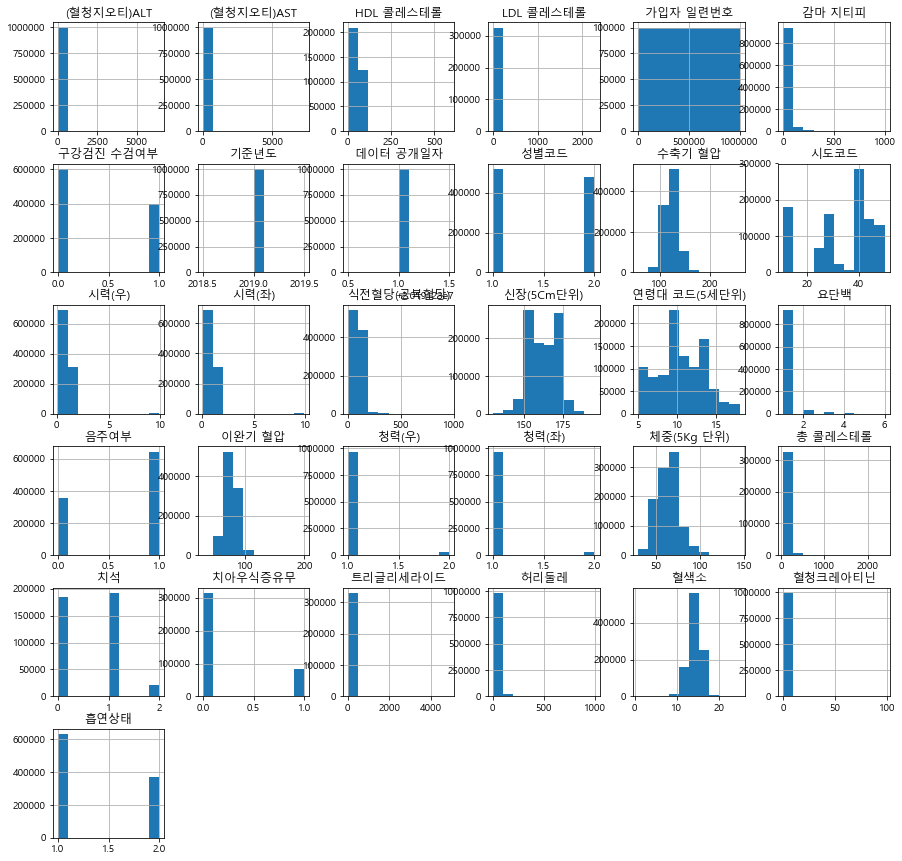

In [12]:
h = df.hist(figsize=(15,15))

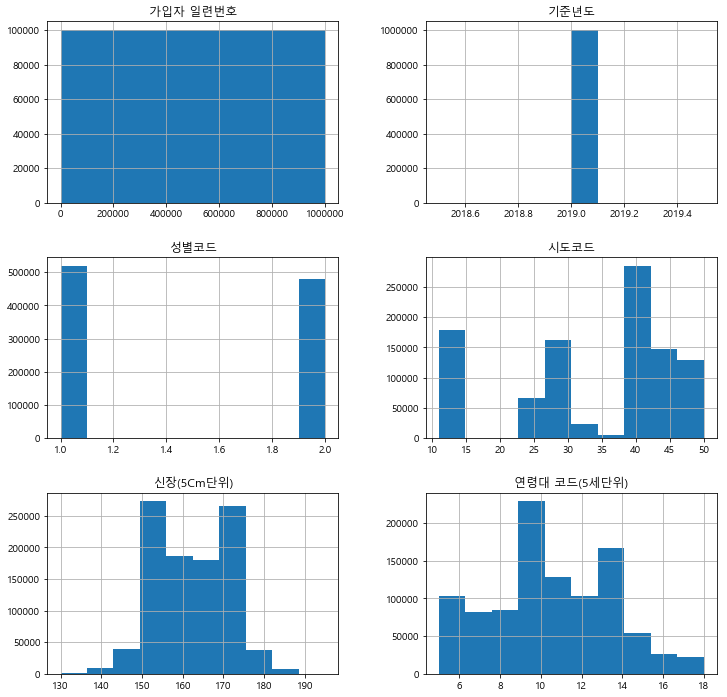

In [13]:
h= df.iloc[:,:6].hist(figsize=(12,12))

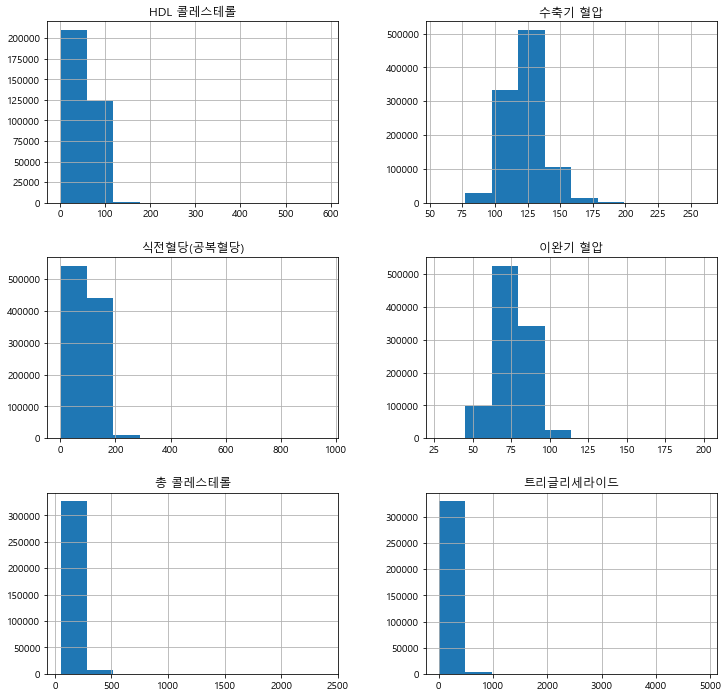

In [14]:
h= df.iloc[:,12:18].hist(figsize=(12,12),bins=10)

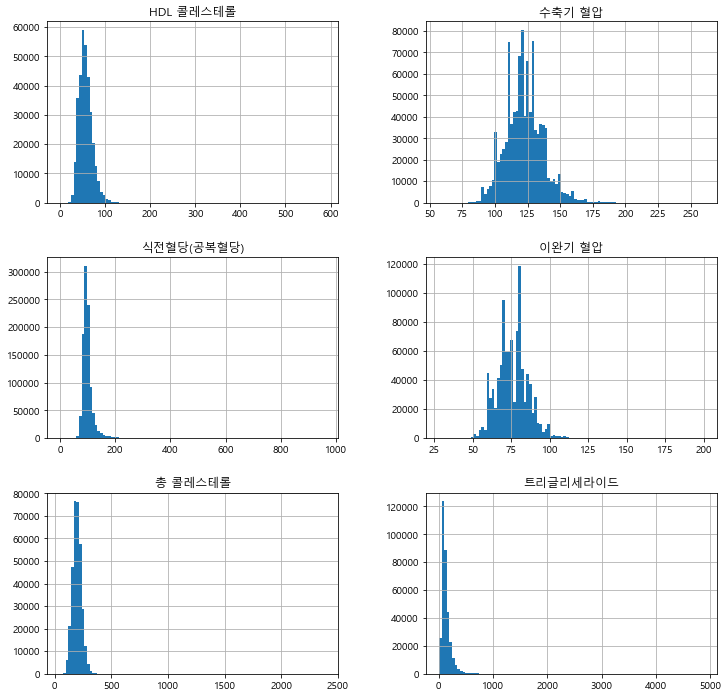

In [15]:
h= df.iloc[:,12:18].hist(figsize=(12,12),bins=100)

In [16]:
#df["음주여부"].value.couts.bar #bin으로 빈도 설정 가능

### seaborn으로 시각화

### 범주형(카테고리) 데이터 시각화
#### > countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현
#### > value_counts로 구한 값을 시각화 하는 것과 같음.

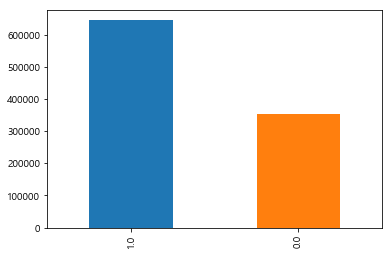

In [17]:
df["음주여부"].fillna(0).value_counts().plot.bar()

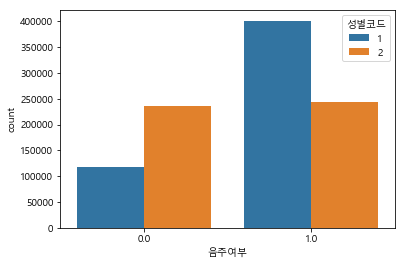

In [18]:
sns.countplot(data=df, x="음주여부", hue="성별코드")

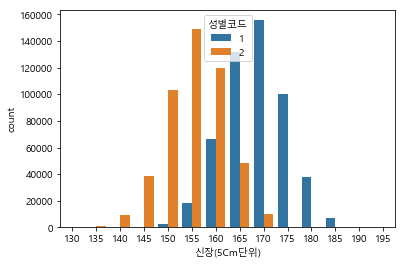

In [19]:
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

#### > 키와 몸무게 데이터는 사실 연속형 데이터로 볼 수 있다.
#### > 하지만 이 데이터에서는 5cm / 5kg 단위로 구분되어 있다.
#### > 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있다.

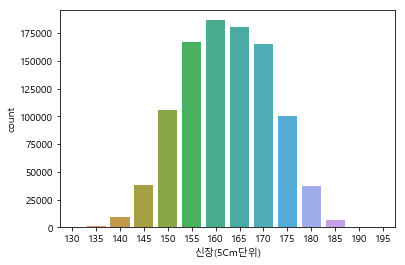

In [20]:
sns.countplot(data=df, x="신장(5Cm단위)")

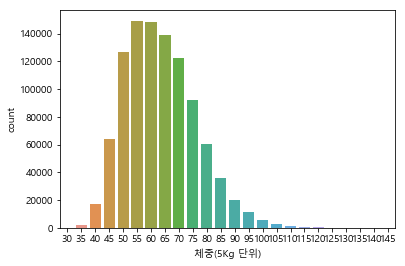

In [21]:
sns.countplot(data=df, x="체중(5Kg 단위)")

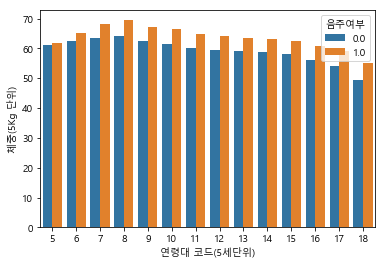

In [22]:
sns.barplot(data=df, x="연령대 코드(5세단위)", y="체중(5Kg 단위)",hue="음주여부", ci=None)

#### > ci=None으로 빠르게 나오게 할 수 있음
#### > ci =  신뢰구간 그래서 신뢰구간 계산이 오래 걸려서 빠르게 진행하려면 신뢰구간을 None으로 함. 

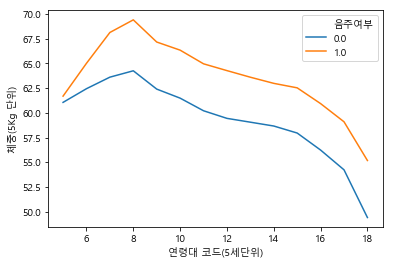

In [23]:
sns.lineplot(data=df, x="연령대 코드(5세단위)", y="체중(5Kg 단위)",hue="음주여부", ci=None)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


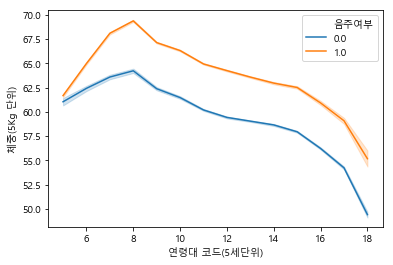

In [24]:
sns.lineplot(data=df, x="연령대 코드(5세단위)", y="체중(5Kg 단위)",hue="음주여부", ci=95)

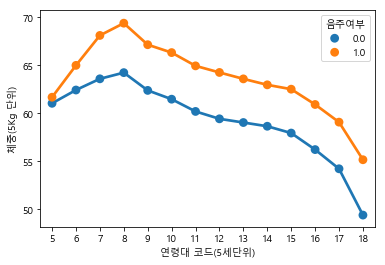

In [25]:
sns.pointplot(data=df, x="연령대 코드(5세단위)", y="체중(5Kg 단위)",hue="음주여부", ci=None)

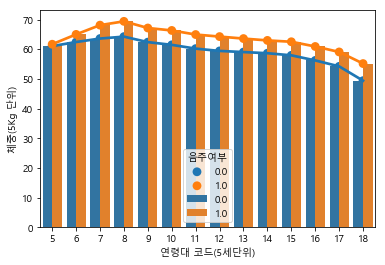

In [26]:
sns.pointplot(data=df, x="연령대 코드(5세단위)", y="체중(5Kg 단위)",hue="음주여부", ci=None)
sns.barplot(data=df, x="연령대 코드(5세단위)", y="체중(5Kg 단위)",hue="음주여부", ci=None)

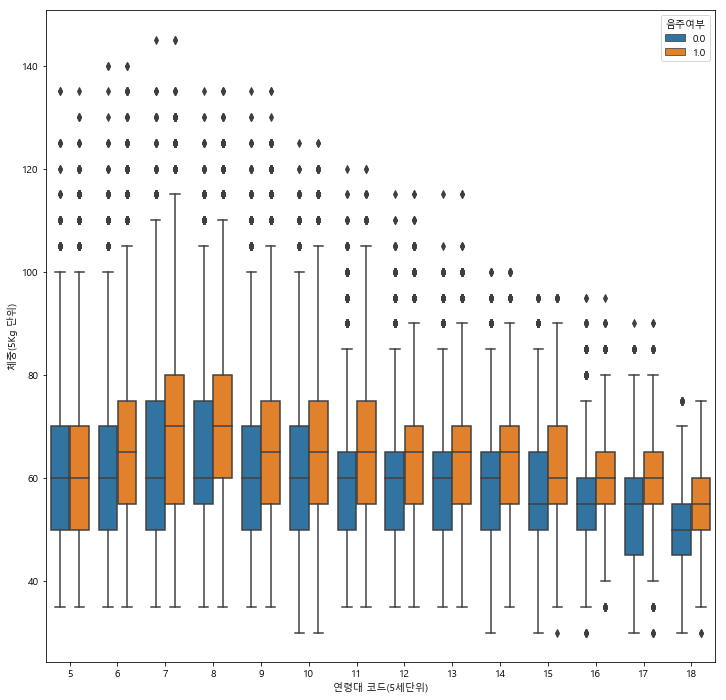

In [27]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df,x="연령대 코드(5세단위)", y="체중(5Kg 단위)",hue="음주여부")

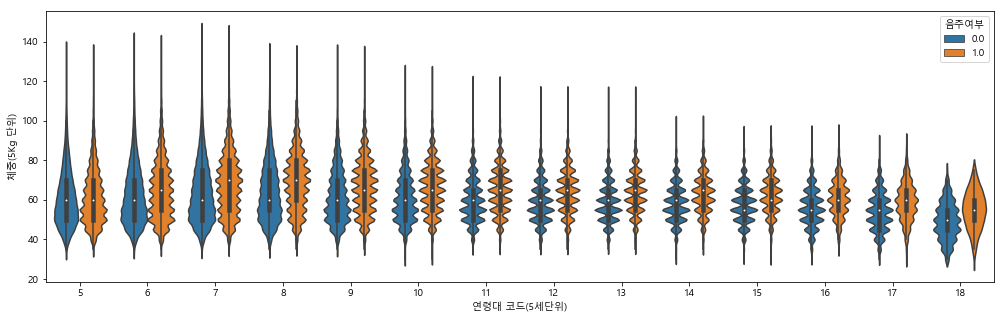

In [28]:
plt.figure(figsize=(17,5))
sns.violinplot(data=df,x="연령대 코드(5세단위)", y="체중(5Kg 단위)",hue="음주여부")

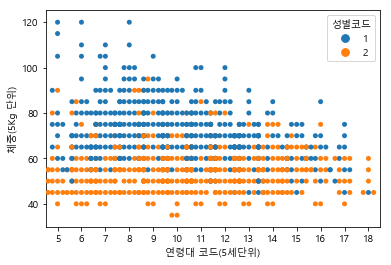

In [29]:
sns.swarmplot(data=df.sample(1000, random_state=2),x="연령대 코드(5세단위)", y="체중(5Kg 단위)",hue="성별코드")

### 수치형 데이터 시각화

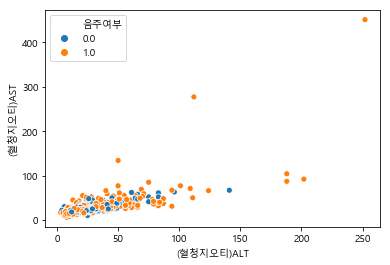

In [30]:
sns.scatterplot(data=df.sample(1000, random_state=2),x="(혈청지오티)ALT", y="(혈청지오티)AST",hue="음주여부")

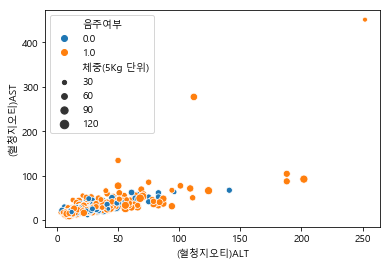

In [31]:
sns.scatterplot(data=df.sample(1000, random_state=2),x="(혈청지오티)ALT", y="(혈청지오티)AST",hue="음주여부", size="체중(5Kg 단위)")

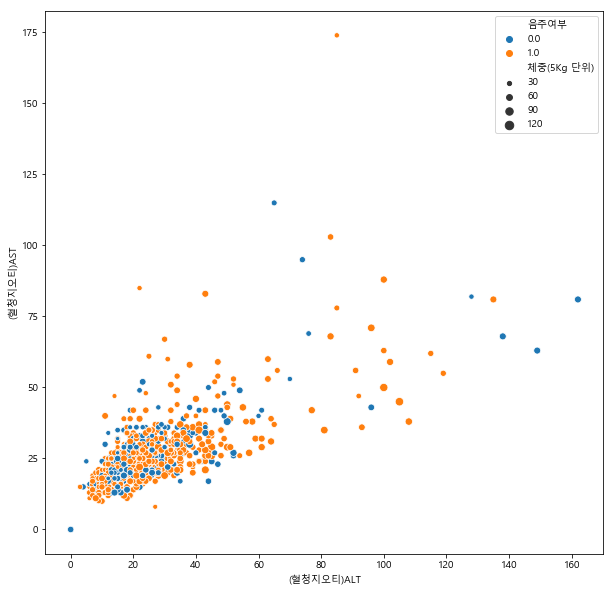

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=df.sample(1000, random_state=3).fillna(0), 
    x="(혈청지오티)ALT", 
    y="(혈청지오티)AST", 
    hue="음주여부", 
    size="체중(5Kg 단위)"
)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


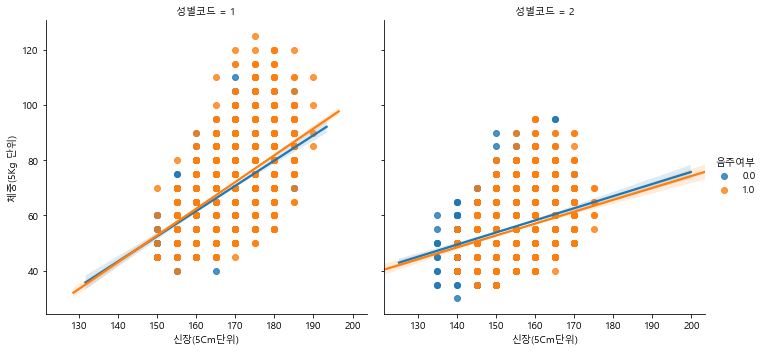

In [34]:
sns.lmplot(
    data=df.sample(10000, random_state=2).fillna(0),
    x="신장(5Cm단위)",
    y="체중(5Kg 단위)",
    hue="음주여부",
    col="성별코드"
)

In [35]:
df_ASLT = df[(df["(혈청지오티)ALT"]<400) & (df["(혈청지오티)AST"]<400)]
df_ASLT.shape

(994092, 34)

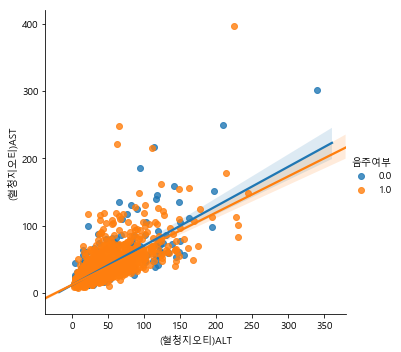

In [36]:
sns.lmplot(
    data=df_ASLT.sample(10000).fillna(0),
    x="(혈청지오티)ALT",
    y="(혈청지오티)AST",
    hue="음주여부"
)

In [37]:
df_ASLT_high = df[(df["(혈청지오티)ALT"]>=400) | (df["(혈청지오티)AST"]>=400)]
df_ASLT_high.shape

(385, 34)

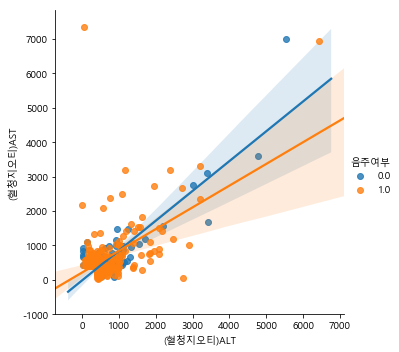

In [38]:
sns.lmplot(
    data=df_ASLT_high.fillna(0),
    x="(혈청지오티)ALT",
    y="(혈청지오티)AST",
    hue="음주여부"
)

In [39]:
df_chol = df["총 콜레스테롤"][df["총 콜레스테롤"].notnull() & (df["총 콜레스테롤"]< 400)]
df_chol.shape

(333451,)

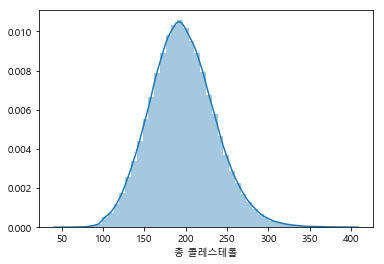

In [40]:
sns.distplot(df_chol, bins=50)

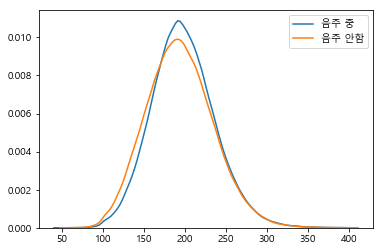

In [41]:
sns.kdeplot(df.loc[df["총 콜레스테롤"].notnull()& (df["총 콜레스테롤"]<400)&(df["음주여부"]==1),"총 콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[df["총 콜레스테롤"].notnull()& (df["총 콜레스테롤"]<400)&(df["음주여부"]==0),"총 콜레스테롤"], label="음주 안함")
#label은 행렬을 뽑아서 그래프를 그림 sample이랑 많이 다를게 X

In [42]:
df.loc[:100, ["연령대 코드(5세단위)", "신장(5Cm단위)"]]

,연령대 코드(5세단위),신장(5Cm단위)
0,13,165
1,5,155
2,13,160
3,12,170
4,10,170
5,8,170
6,6,175
7,12,165
8,14,165
9,13,145


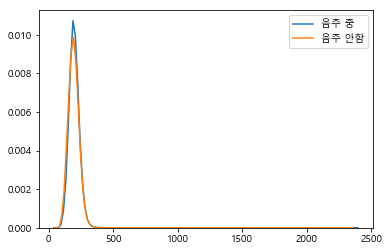

In [43]:
sns.kdeplot(df.loc[df["총 콜레스테롤"].notnull() & (df["음주여부"]==1),"총 콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[df["총 콜레스테롤"].notnull() & (df["음주여부"].fillna(0)==0),"총 콜레스테롤"], label="음주 안함")

### 상관분석
- [상관분석 - 위키백과,우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
로 해석한다.
```

In [44]:
cor_columns = ['연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']
cor_columns

['연령대 코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기 혈압',
 '이완기 혈압',
 '식전혈당(공복혈당)',
 '총 콜레스테롤',
 '트리글리세라이드',
 'HDL 콜레스테롤',
 'LDL 콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마 지티피',
 '흡연상태',
 '음주여부']

In [46]:
df_corr = df[cor_columns].fillna(0).corr()
df_corr

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
연령대 코드(5세단위),1.000000,-0.387673,-0.192033,0.156154,-0.170121,-0.159067,0.214309,0.210237,0.168284,0.030725,...,0.161221,0.149535,-0.194718,0.002250,0.013953,0.051857,-0.027065,0.015708,-0.047176,-0.350083
신장(5Cm단위),-0.387673,1.000000,0.668569,0.309589,0.136021,0.132671,-0.089124,-0.090862,0.068975,0.142456,...,-0.056768,-0.031254,0.471263,0.026231,0.180853,0.043680,0.150102,0.167271,0.463648,0.342778
체중(5Kg 단위),-0.192033,0.668569,1.000000,0.737746,0.086519,0.084340,-0.049752,-0.051095,0.237207,0.270687,...,-0.041564,0.008603,0.430742,0.041835,0.157590,0.103595,0.274639,0.227571,0.377584,0.223874
허리둘레,0.156154,0.309589,0.737746,1.000000,0.003079,0.004815,0.040644,0.038190,0.267309,0.242925,...,0.007077,0.051106,0.277666,0.042728,0.117467,0.113834,0.242051,0.221477,0.269499,0.052515
시력(좌),-0.170121,0.136021,0.086519,0.003079,1.000000,0.329719,-0.043003,-0.044230,-0.023579,0.010888,...,-0.027315,-0.022808,0.078038,-0.002495,0.017361,-0.003359,0.019662,0.014536,0.056057,0.083088
시력(우),-0.159067,0.132671,0.084340,0.004815,0.329719,1.000000,-0.039275,-0.040386,-0.020384,0.012118,...,-0.025033,-0.021343,0.077575,-0.007316,0.017208,-0.003223,0.019265,0.015555,0.056137,0.080083
청력(좌),0.214309,-0.089124,-0.049752,0.040644,-0.043003,-0.039275,1.000000,0.552496,0.024108,-0.024178,...,0.023125,0.021181,-0.064155,0.005337,0.010862,0.005837,-0.014703,-0.001932,-0.007618,-0.083690
청력(우),0.210237,-0.090862,-0.051095,0.038190,-0.044230,-0.040386,0.552496,1.000000,0.023099,-0.023521,...,0.023009,0.020684,-0.064707,0.005921,0.009520,0.005682,-0.014550,-0.001220,-0.011839,-0.084310
수축기 혈압,0.168284,0.068975,0.237207,0.267309,-0.023579,-0.020384,0.024108,0.023099,1.000000,0.797657,...,0.071127,0.073908,0.410460,0.138129,0.123243,0.109568,0.132203,0.165268,0.099466,0.004965
이완기 혈압,0.030725,0.142456,0.270687,0.242925,0.010888,0.012118,-0.024178,-0.023521,0.797657,1.000000,...,0.048368,0.059814,0.456356,0.121396,0.111319,0.107584,0.148543,0.185981,0.138587,0.083927


In [47]:
df_corr.loc[df_corr["신장(5Cm단위)"]>0.1, "신장(5Cm단위)"]

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.668569
허리둘레          0.309589
시력(좌)         0.136021
시력(우)         0.132671
이완기 혈압        0.142456
혈색소           0.471263
혈청크레아티닌       0.180853
(혈청지오티)ALT    0.150102
감마 지티피        0.167271
흡연상태          0.463648
음주여부          0.342778
Name: 신장(5Cm단위), dtype: float64

In [48]:
df_corr.loc[df_corr["음주여부"]>0.25, "음주여부"]

신장(5Cm단위)    0.342778
흡연상태         0.272580
음주여부         1.000000
Name: 음주여부, dtype: float64

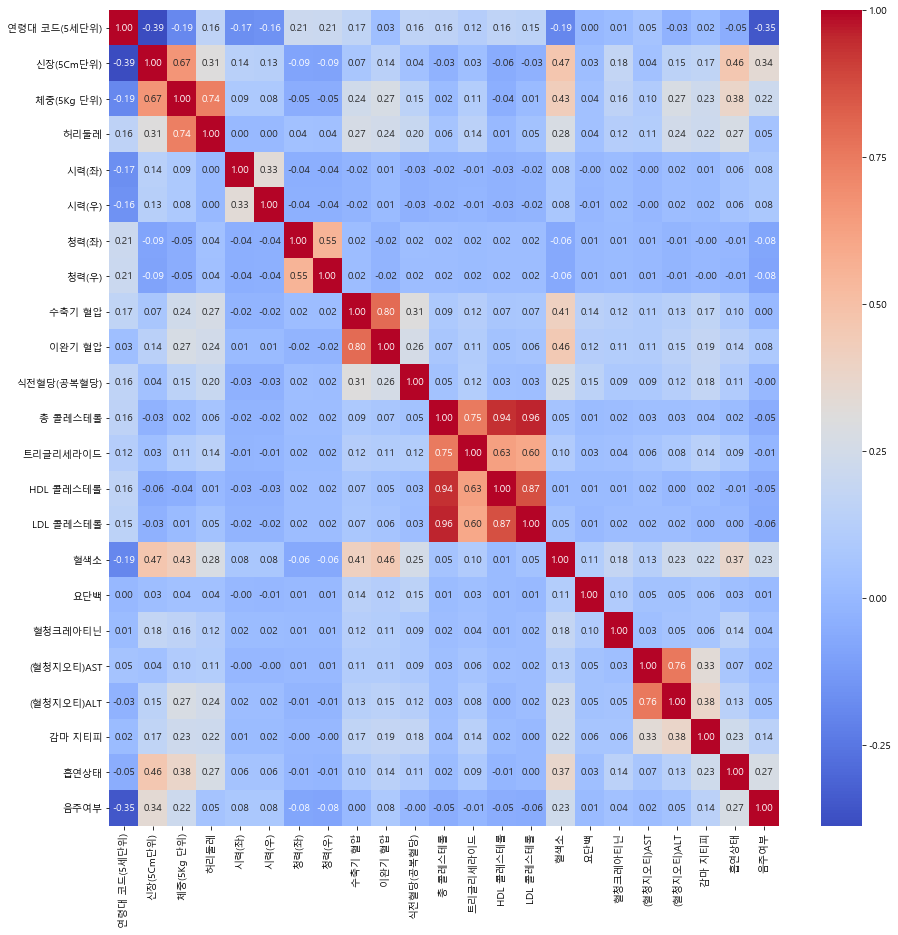

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_corr, annot=True, fmt=".2f", cmap="coolwarm")